### Polynomial Regression

In [7]:
#Polynomial Regression
#Importing Libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
dataset = pd.read_csv('Position_Salaries.csv')

In [8]:
# X = independant variables and Y = dependant variables
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

In [3]:
#Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
#include de matrix of polynomial features into our linear Regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
import statsmodels.api as sm
lin_reg_3 = sm.OLS(endog = Y, exog= X_poly[:, [0, 1, 2, 3, 4]]).fit()
lin_reg_3.summary()

D:\Programas\Anaconda\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.21e-06
Time:                        19:44:34   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
x1          -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
x2          9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
x3         -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
x4           890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

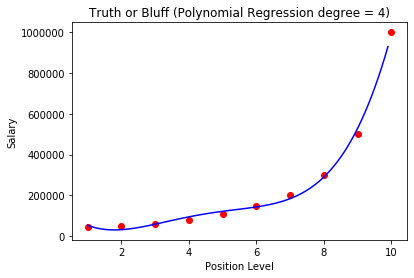

In [6]:
#Visualising the polynomial regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree = 4)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()